In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
#installing all the libraries needed for the task
import pandas as pd
import json
import nltk
from pandas.io.json import json_normalize
nltk.download('stopwords')
nltk.download('punkt')
import re  
from nltk.corpus import stopwords
stops1 = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
#converting json to pandas dataframe
with open('/gdrive/My Drive/Colab Notebooks/layer1.json', 'r') as f:
    data = json.load(f)
    
df = pd.DataFrame(data)
df.head()

,id,ingredients,instructions,partition,title,url
0,000018c8a5,"[{'text': '6 ounces penne'}, {'text': '2 cups ...",[{'text': 'Preheat the oven to 350 F. Butter o...,train,Worlds Best Mac and Cheese,http://www.epicurious.com/recipes/food/views/-...
1,000033e39b,"[{'text': '1 c. elbow macaroni'}, {'text': '1 ...",[{'text': 'Cook macaroni according to package ...,train,Dilly Macaroni Salad Recipe,http://cookeatshare.com/recipes/dilly-macaroni...
2,000035f7ed,"[{'text': '8 tomatoes, quartered'}, {'text': '...",[{'text': 'Add the tomatoes to a food processo...,train,Gazpacho,http://www.foodnetwork.com/recipes/gazpacho1.html
3,00003a70b1,"[{'text': '2 12 cups milk'}, {'text': '1 12 cu...",[{'text': 'Preheat oven to 350 degrees Fahrenh...,test,Crunchy Onion Potato Bake,http://www.food.com/recipe/crunchy-onion-potat...
4,00004320bb,[{'text': '1 (3 ounce) package watermelon gela...,"[{'text': 'Dissolve Jello in boiling water.'},...",train,Cool 'n Easy Creamy Watermelon Pie,http://www.food.com/recipe/cool-n-easy-creamy-...


In [0]:
df.ingredients.head(20)

0     [{'text': '6 ounces penne'}, {'text': '2 cups ...
1     [{'text': '1 c. elbow macaroni'}, {'text': '1 ...
2     [{'text': '8 tomatoes, quartered'}, {'text': '...
3     [{'text': '2 12 cups milk'}, {'text': '1 12 cu...
4     [{'text': '1 (3 ounce) package watermelon gela...
5     [{'text': '12 cup shredded coconut'}, {'text':...
6     [{'text': '2 Chicken thighs'}, {'text': '2 tsp...
7     [{'text': '6 -8 cups fresh rhubarb, or'}, {'te...
8     [{'text': '8 ounces, weight Light Fat Free Van...
9     [{'text': '2 cups flour'}, {'text': '1 tablesp...
10    [{'text': '1/2 cup green onions, chopped'}, {'...
11    [{'text': '1 teaspoon fennel seeds'}, {'text':...
12    [{'text': '1 (750 ml) bottle rose wine, chille...
13    [{'text': '14 cup butter'}, {'text': '34 cup b...
14    [{'text': '200 grams Cake flour'}, {'text': '1...
15    [{'text': '1 can tomato sauce'}, {'text': '1 c...
16    [{'text': '1 12 lbs ground beef'}, {'text': '3...
17    [{'text': '1 (10 ounce) package frozen cho

In [33]:
ingredients = pd.io.json.json_normalize(data, record_path='ingredients')
ingredients.tail()


,text
9605389,8 cups water
9605390,2/3 cup packed light brown sugar
9605391,1 teaspoon molasses
9605392,2 (3-inch) cinnamon sticks
9605393,1 cup medium-grind coffee (not espresso)


In [32]:
#Counting the number of occurrences of quantities
#list = {"ounce","cup","teaspoon","lbs","tbsp","pound","piece","slice","dozen","gram","pinch","tablespoons"}
# making series 
#series = pd.Series(list) 
  
ingredients.text.str.count("tablespoons")
ingredients.text.str.count("tablespoons").sum()
#ingredients.info

703579

In [34]:
#Creating a df of the counts and visualising it
data = [['ounce', 663540], ['cup', 2671960], ['teaspoon', 1436012],['lbs',72205],['tbsp',133997],['pound',162761],['piece',86804],['slice',363711],['dozen',2396],['gram',53798],['pinch',54814],['tablespoons',703579]] 
df_quantity = pd.DataFrame(data, columns = ['Unit', 'Occurences'])
df_quantity.head()


,Unit,Occurences
0,ounce,663540
1,cup,2671960
2,teaspoon,1436012
3,lbs,72205
4,tbsp,133997


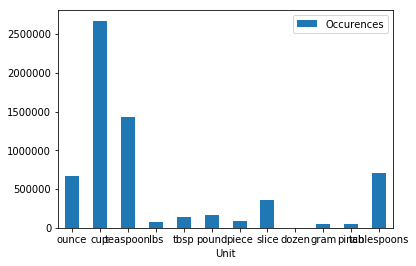

In [42]:
#Visualising the number of occurences of the units
import matplotlib.pyplot as plt

ax = df_quantity.plot.bar(x='Unit', y='Occurences', rot=0)





In [0]:
train1 = pd.DataFrame(pd.concat([ ingredients['text']], axis=1))
train1.head()

,text
0,6 ounces penne
1,2 cups Beechers Flagship Cheese Sauce (recipe ...
2,"1 ounce Cheddar, grated (1/4 cup)"
3,"1 ounce Gruyere cheese, grated (1/4 cup)"
4,1/4 to 1/2 teaspoon chipotle chili powder (see...


,text
0,6 ounces penne
1,2 cups Beechers Flagship Cheese Sauce (recipe ...
2,"1 ounce Cheddar, grated (1/4 cup)"
3,"1 ounce Gruyere cheese, grated (1/4 cup)"
4,1/4 to 1/2 teaspoon chipotle chili powder (see...


In [0]:
def clean_sent(sent):
    #sent = sent.lower()
    sent = re.sub(u'[_"\-;%()|+&=*%.,!?:#$@\[\]/]',' ',sent)
    return sent
def clean(df):
    df['text'] = df.text.map(lambda x: ' '.join([ word for word in
                                                         nltk.word_tokenize(clean_sent(x))]).encode('utf-8'))

    #df['instructions'] = df.instructions.map(lambda x: ' '.join([ word for word in
                                                         #nltk.word_tokenize(clean_sent(x))]).encode('utf-8'))
def removeStopWords(df, stop):
	df['text'] = df.text.map(lambda x: ' '.join([word for word in nltk.word_tokenize(x.decode('utf-8'))
                                                         if word not in stop]).encode('utf-8'))
	#df['instructions'] = df.instructions.map(lambda x: ' '.join([word for word in nltk.word_tokenize(x.decode('utf-8'))
                                                         #if word not in stop]).encode('utf-8'))

In [0]:
#Calling Clean and Stop words on Amazon Product data DF
clean(train1)
removeStopWords(train1, stops1)

In [0]:
#Calling out the pre-processed data frame named train1
train1.head()

,text
0,b'6 ounces penne'
1,b'2 cups Beechers Flagship Cheese Sauce recipe...
2,b'1 ounce Cheddar grated 1 4 cup'
3,b'1 ounce Gruyere cheese grated 1 4 cup'
4,b'1 4 1 2 teaspoon chipotle chili powder see N...


In [0]:
#Writing to a CSV
train1.to_csv(r'/gdrive/My Drive/Colab Notebooks/d_ingredients_quantity.csv', index=False, header=True)